<a href="https://colab.research.google.com/github/dharanipriyaR24/Obesity-Data-Analysis/blob/main/Obesity_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team members:
---
#### Yaswanth Kumar MacHavarapu
#### Dharanipriya Ravindran
#### Rishi Kiran Munuswamy
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### Dropping unnecessary columns

In [4]:
df.drop(columns=["CH2O", "TUE"], inplace=True)

### Checking for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
SCC                               0
FAF                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
zero_values = (df == 0).sum()
print("Zero values in each column:\n", zero_values)

Zero values in each column:
 Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
SCC                                 0
FAF                               411
CALC                                0
MTRANS                              0
NObeyesdad                          0
dtype: int64


### Creating binary variables for meal consumption habits

In [7]:
df["main_meal_bin"] = df["NCP"].apply(lambda x: "less_than_three" if x < 3 else "three_meals_or_more")
df["vege_bin"] = df["FCVC"].apply(lambda x: "less_than_three" if x < 3 else "three_meals_or_more")

### Converting categorical variables into binary ("yes"/"no")

In [8]:
binary_columns = ["SMOKE", "SCC"]
for col in binary_columns:
    df[col] = df[col].map({"yes": 1, "no": 0})

### Converting physical activity frequency (FAF) into binary (active vs. inactive)

In [9]:
df["FAF"] = df["FAF"].apply(lambda x: 1 if x > 0 else 0)

### Converting alcohol consumption frequency into binary ("yes" if occasionally/frequently, "no" otherwise)

In [10]:
df["CALC"] = df["CALC"].apply(lambda x: 1 if x in ["Sometimes", "Frequently", "Always"] else 0)

### Calculating BMI and categorize obesity levels using WHO standards

In [11]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return "normal and underweight"
    elif 18.5 <= bmi < 25:
        return "normal and underweight"
    elif 25 <= bmi < 30:
        return "overweight"
    else:
        return "obesity"

df["Obesity_Category"] = df["BMI"].apply(categorize_bmi)

### Calculating CVD risk based on BMI and smoking status

In [12]:
def calculate_cvd_risk(row):
    if row["BMI"] >= 30 or row["SMOKE"] == 1:
        return "high"
    elif 25 <= row["BMI"] < 30:
        return "moderate"
    else:
        return "low"

df["CVD_Risk"] = df.apply(calculate_cvd_risk, axis=1)

In [13]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC  SMOKE  SCC  FAF  CALC                 MTRANS  \
0      no   2.0  3.0  Sometimes      0    0    0     0  Public_Transportation   
1      no   3.0  3.0  Sometimes      1    1    1     1  Public_Transportation   
2      no   2.0  3.0  Sometimes      0    0    1     1  Public_Transportation   
3      no   3.0  3.0  Sometimes      0    0    1     1                Walking   
4      no   2.0  1.0  Sometimes      0    0    0     1  Public_Transportation   
...   ...   ...  ...        ...    ...  ...  ...   ...                    ...   
2106  yes   3.0  3.0  Sometimes      0    0    1     1  Public_Transportation   
2107  yes   3.0  3.0  Sometimes      0    0    1     1  Public_Transportation   
2108  yes   3.0  3.0  Sometimes      0    0    1     1  Public_Transportation   
2109  yes   3.0  3.0  Sometimes      0    0    1     1  Public_Transportation   
2110  yes   3.0  3.0  Sometimes      0    0    1     1  Public_Transportation   

               NObeyesdad        main_meal_bin             vege_bin  \
0           Normal_Weight  three_meals_or_more      less_than_three   
1           Normal_Weight  three_meals_or_more  three_meals_or_more   
2           Normal_Weight  three_meals_or_more      less_than_three   
3      Overweight_Level_I  three_meals_or_more  three_meals_or_more   
4     Overweight_Level_II      less_than_three      less_than_three   
...                   ...                  ...                  ...   
2106     Obesity_Type_III  three_meals_or_more  three_meals_or_more   
2107     Obesity_Type_III  three_meals_or_more  three_meals_or_more   
2108     Obesity_Type_III  three_meals_or_more  three_meals_or_more   
2109     Obesity_Type_III  three_meals_or_more  three_meals_or_more   
2110     Obesity_Type_III  three_meals_or_more  three_meals_or_more   

            BMI        Obesity_Category  CVD_Risk  
0     24.386526  normal and underweight       low  
1     24.238227  normal and underweight      high  
2     23.765432  normal and underweight       low  
3     26.851852              overweight  moderate  
4     28.342381              overweight  moderate  
...         ...                     ...       ...  
2106  44.901475                 obesity      high  
2107  43.741923                 obesity      high  
2108  43.543817                 obesity      high  
2109  44.071535                 obesity      high  
2110  44.144338                 obesity      high  

[2111 rows x 20 columns]

### Saving the processed dataset to a CSV file

In [14]:
processed_file_path = "Processed_ObesityDataSet.csv"
df.to_csv(processed_file_path, index=False) # Changed processed_df to df

#  Exploratory Data Analysis
---

In [15]:
df = pd.read_csv('Processed_ObesityDataSet.csv')

### Normalize and Scale Numerical Data

In [16]:
numeric_cols = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()
df[numeric_cols.columns] = scaler.fit_transform(df[numeric_cols.columns])

In [17]:
sns.set_theme(style="whitegrid")

#### (a) Compute basic statistics for numerical columns only

In [18]:
numeric_cols = df.select_dtypes(include=['number'])
stats_summary = df[numeric_cols.columns].describe().T
stats_summary["median"] = df[numeric_cols.columns].median()
print(stats_summary)

         count      mean       std  min       25%       50%       75%  max  \
Age     2111.0  0.219417  0.135021  0.0  0.126536  0.186764  0.255319  1.0   
Height  2111.0  0.474863  0.176047  0.0  0.339623  0.472640  0.600875  1.0   
Weight  2111.0  0.355120  0.195457  0.0  0.197562  0.328358  0.510677  1.0   
FCVC    2111.0  0.709522  0.266963  0.0  0.500000  0.692751  1.000000  1.0   
NCP     2111.0  0.561876  0.259346  0.0  0.552913  0.666667  0.666667  1.0   
SMOKE   2111.0  0.020843  0.142893  0.0  0.000000  0.000000  0.000000  1.0   
SCC     2111.0  0.045476  0.208395  0.0  0.000000  0.000000  0.000000  1.0   
FAF     2111.0  0.805306  0.396059  0.0  1.000000  1.000000  1.000000  1.0   
CALC    2111.0  0.697300  0.459535  0.0  0.000000  1.000000  1.000000  1.0   
BMI     2111.0  0.441685  0.211867  0.0  0.299556  0.415740  0.608726  1.0   

          median  
Age     0.186764  
Height  0.472640  
Weight  0.328358  
FCVC    0.692751  
NCP     0.666667  
SMOKE   0.000000  
SCC     

#### (b) Boxplots of attributes

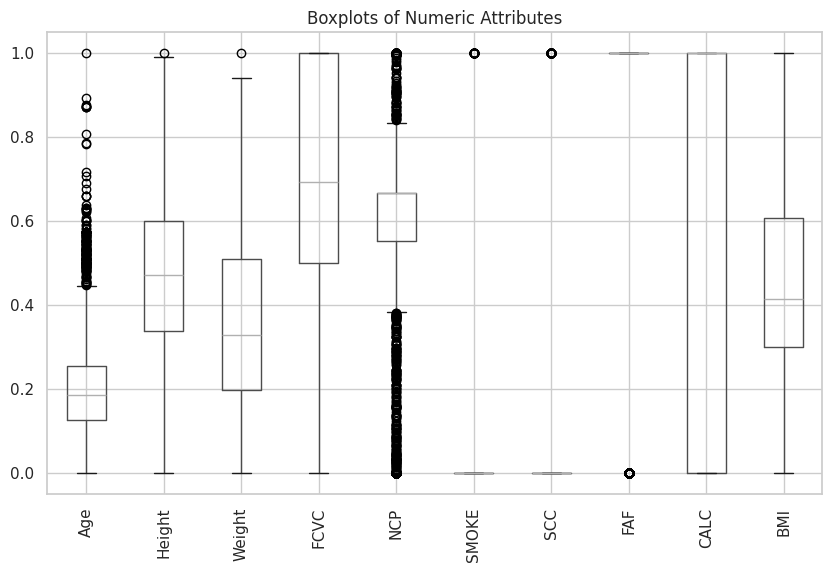

In [19]:
plt.figure(figsize=(10, 6))

numeric_cols.boxplot()
plt.title("Boxplots of Numeric Attributes")
plt.xticks(rotation=90)
plt.show()

#### (c) Pairplot visualization

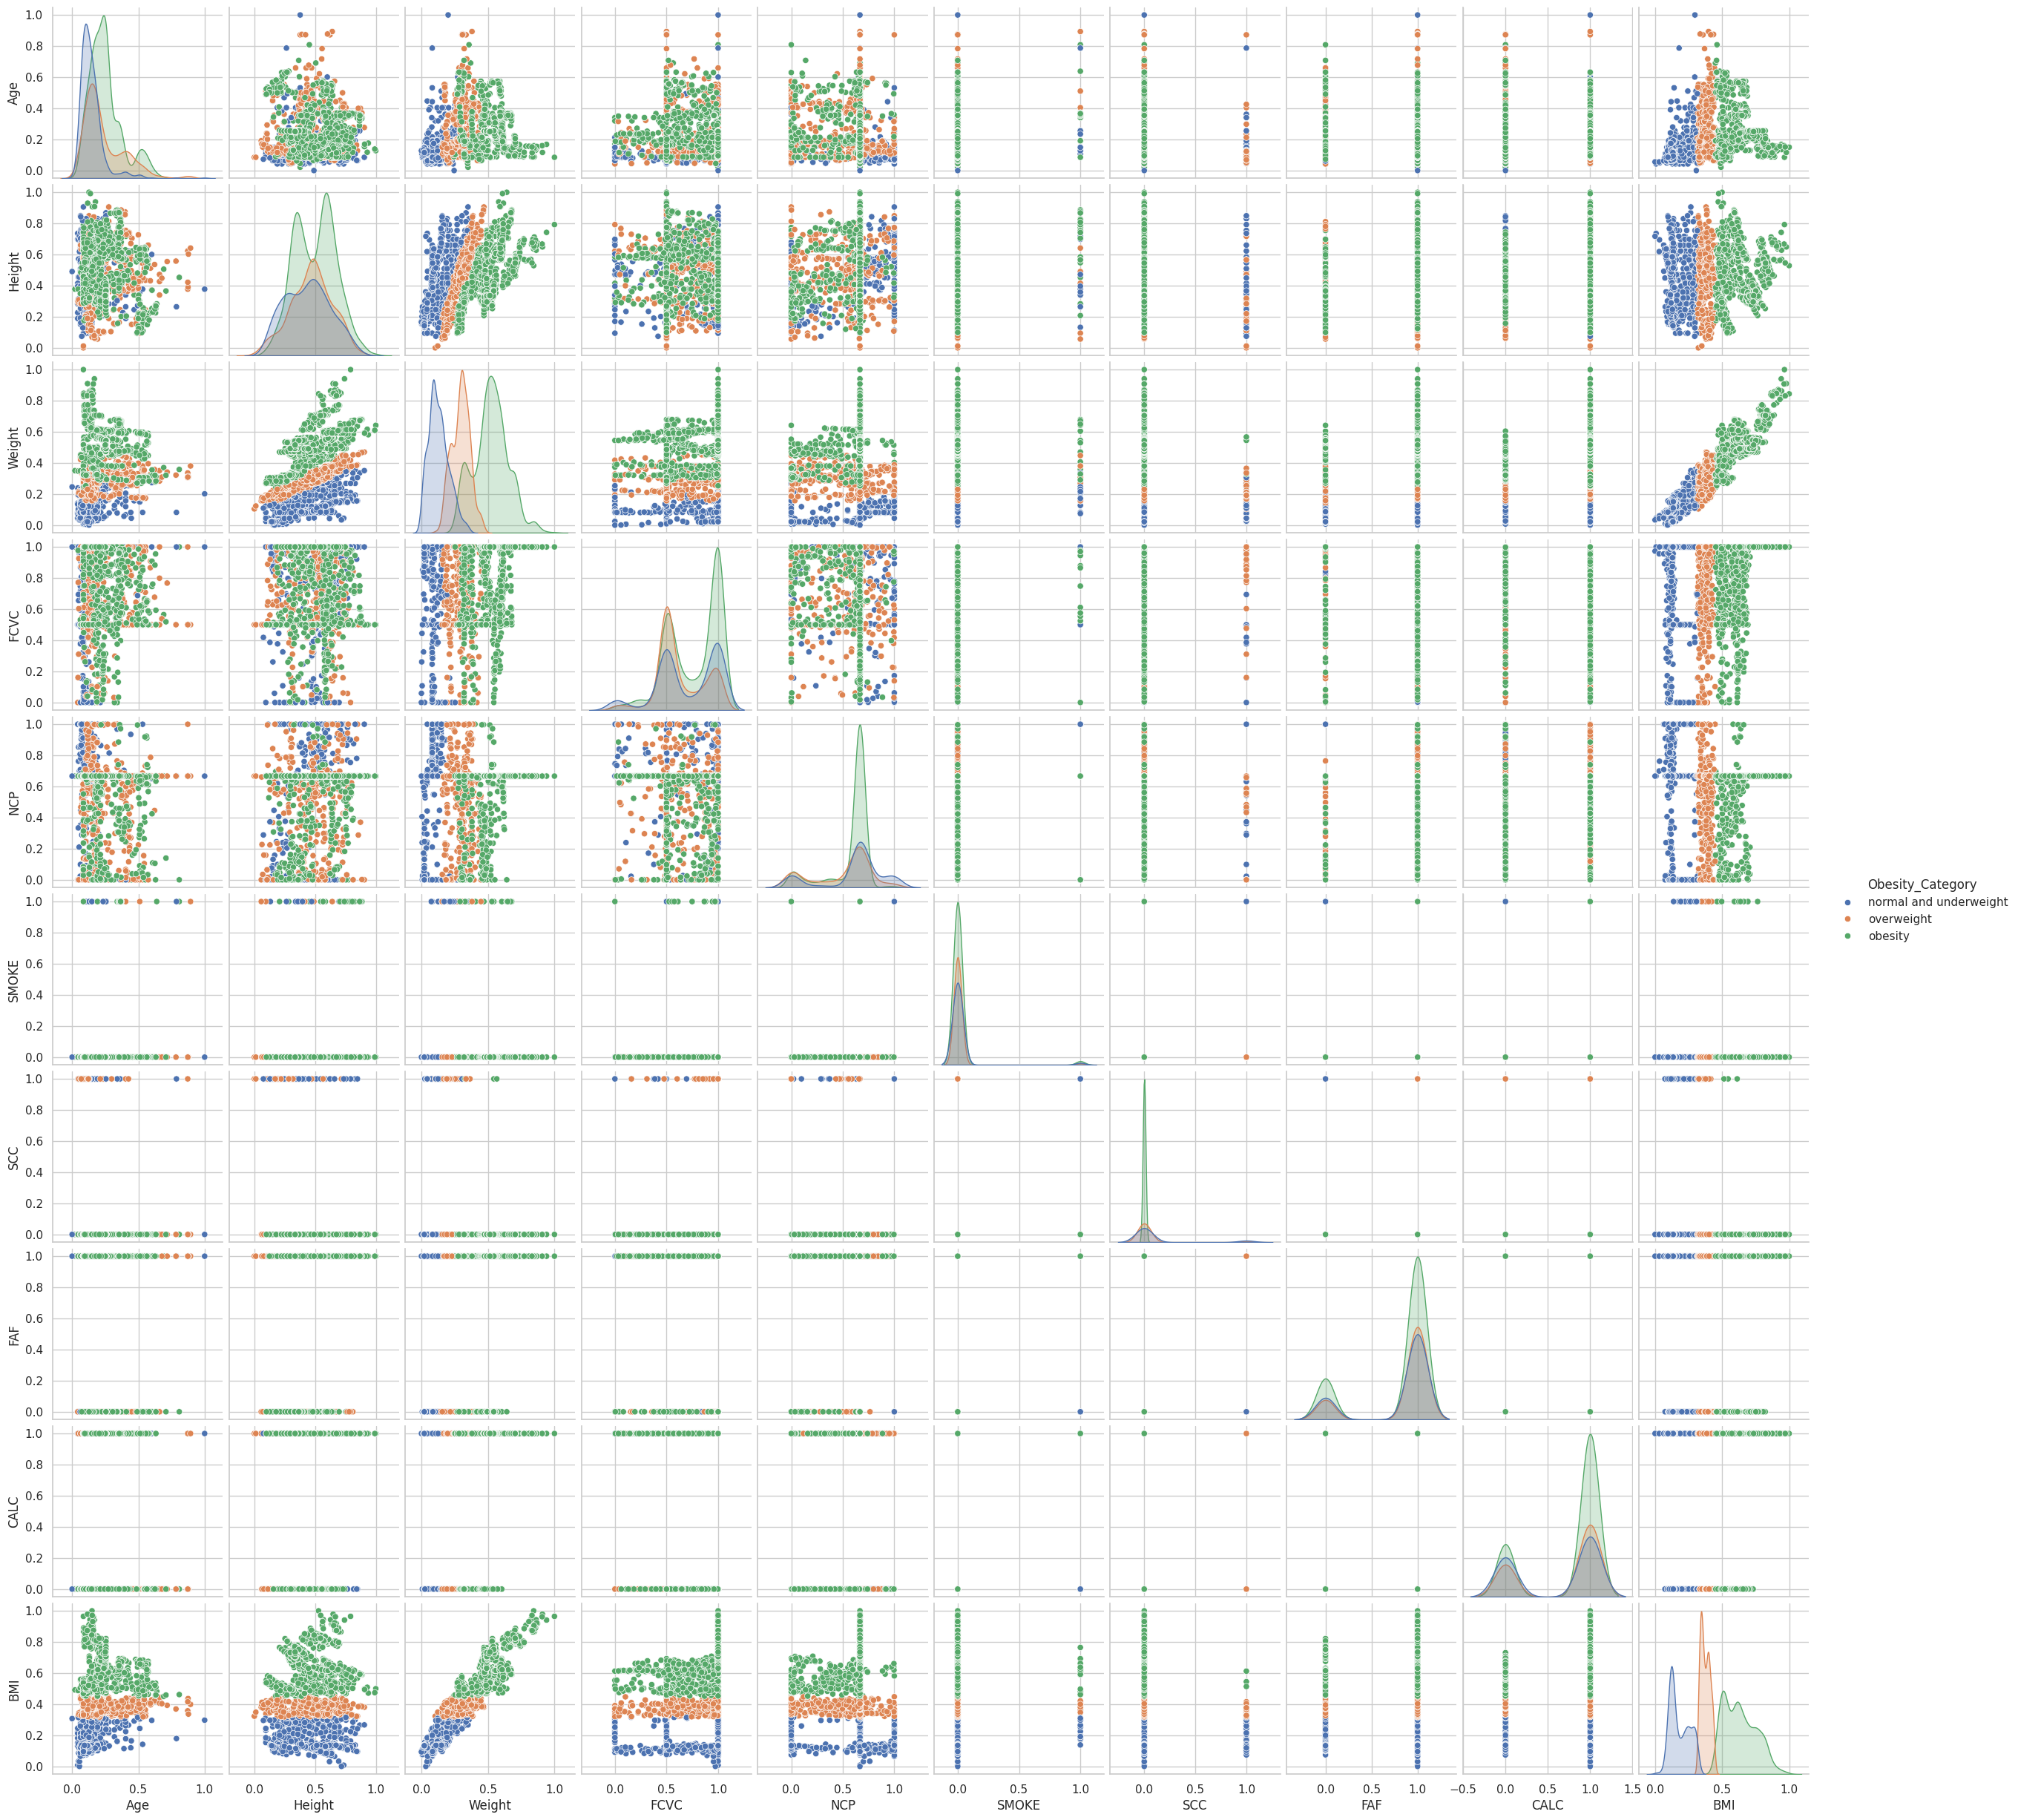

In [20]:
sns.pairplot(df, hue="Obesity_Category", diag_kind="kde", vars=numeric_cols.columns.tolist())
plt.show()

The pairplot shows how different variables are related to each other, with colors indicating different obesity categories (normal, overweight, and obese), making it easier to see the differences between these groups.

#### Correlation Heatmap

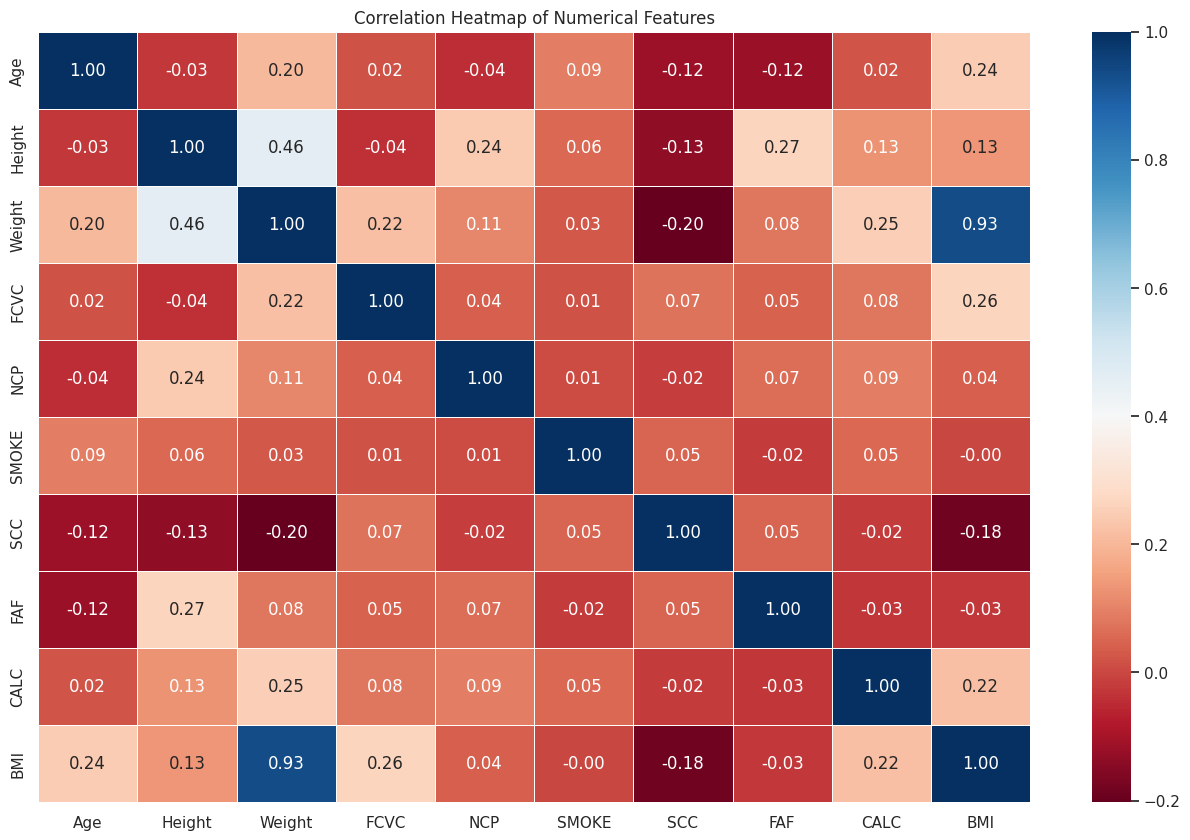

In [21]:
plt.figure(figsize=(16, 10))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The correlation heatmap shows the relationships between numeric features, with color intensity indicating the strength of the correlation, highlighting moderate positive correlation between "Age" and "BMI" and weak correlations between other variables.

#### Identifying outliers using IQR method

In [22]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected in each column:\n", outliers)

Outliers detected in each column:
 Age       168
Height      1
Weight      1
FCVC        0
NCP       579
SMOKE      44
SCC        96
FAF       411
CALC        0
BMI         0
dtype: int64


### (d) Pearson Correlation Calculation for all numerical attributes

In [23]:
strong_corr_threshold = 0.5  # Set threshold for strong correlation
for col in numeric_cols.columns:
    for col2 in numeric_cols.columns:
        if col != col2:
            pearson_corr, _ = pearsonr(numeric_cols[col], numeric_cols[col2])
            print(f'Pearson correlation ({pearson_corr:.3f}) between {col} and {col2}')

Pearson correlation (-0.026) between Age and Height
Pearson correlation (0.203) between Age and Weight
Pearson correlation (0.016) between Age and FCVC
Pearson correlation (-0.044) between Age and NCP
Pearson correlation (0.092) between Age and SMOKE
Pearson correlation (-0.116) between Age and SCC
Pearson correlation (-0.118) between Age and FAF
Pearson correlation (0.019) between Age and CALC
Pearson correlation (0.244) between Age and BMI
Pearson correlation (-0.026) between Height and Age
Pearson correlation (0.463) between Height and Weight
Pearson correlation (-0.038) between Height and FCVC
Pearson correlation (0.244) between Height and NCP
Pearson correlation (0.055) between Height and SMOKE
Pearson correlation (-0.134) between Height and SCC
Pearson correlation (0.266) between Height and FAF
Pearson correlation (0.128) between Height and CALC
Pearson correlation (0.132) between Height and BMI
Pearson correlation (0.203) between Weight and Age
Pearson correlation (0.463) betwee

The best feature for predicting BMI is Weight, as it has the highest Pearson correlation (0.935) with BMI. This strong positive correlation indicates that Weight is the most influential factor in determining BMI compared to all other features.

**Key Observations from Correlation Analysis:**

Strongest Predictor:

Weight and BMI: 0.935 → Strongest correlation, meaning BMI is heavily influenced by Weight.
Moderate Correlation:

FCVC (Vegetable Consumption) and BMI: 0.264 → Minor influence.
Age and BMI: 0.244 → Somewhat relevant but weaker than Weight.
Weak Correlation:

Height and BMI: 0.132 → Weak impact.
NCP (Number of Meals) and BMI: 0.040 → Almost no impact.
SCC (Caloric Consumption Monitoring) and BMI: -0.184 → Weak negative correlation.

**Final Conclusion:**

Weight is the best feature for predicting BMI.
Age, Height, and other lifestyle features have much weaker correlations with BMI.
Other variables may influence obesity but are not as strong in direct BMI prediction.

### (e) Reflection

As a group, we found the dataset analysis manageable since there were no missing values, reducing the need for extensive preprocessing. A key challenge was handling categorical variables effectively, ensuring they were encoded properly for further analysis. Additionally, while zero values in the FAF (Physical Activity Frequency) column were meaningful and required no changes, we had to carefully interpret other numerical values to maintain data integrity. Collaborating as a team helped distribute the workload, but aligning our approaches and ensuring consistency in feature selection and interpretation required effective communication and coordination.

#LINEAR REGRESSION

Multiple Regression Model Performance:
R² Score: 0.9901
Mean Squared Error (MSE): 0.6569
Root Mean Squared Error (RMSE): 0.8105
Mean Absolute Error (MAE): 0.6164


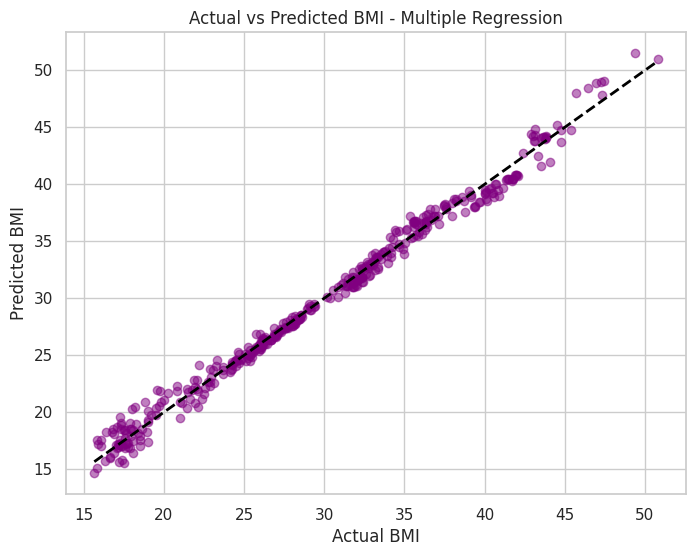


Single-Variable Regression Metrics:
  Feature  Pearson Correlation  R² Score        MSE      RMSE       MAE
0     Age             0.244163  0.067146  61.620767  7.849890  6.548501
1  Height             0.131785  0.018351  64.843937  8.052573  6.716604
2  Weight             0.934806  0.875332   8.235095  2.869686  2.318534
3    FCVC             0.263651  0.076348  61.012890  7.811075  6.607003
4     NCP             0.039969 -0.000599  66.095748  8.129929  6.848170
5   SMOKE            -0.000819 -0.000036  66.058503  8.127638  6.849040
6     SCC            -0.184286  0.036633  63.636351  7.977240  6.671819
7     FAF            -0.025783 -0.000079  66.061351  8.127813  6.856088
8    CALC             0.216842  0.025831  64.349854  8.021836  6.864457


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

dataset_path = "/content/Processed_ObesityDataSet.csv"
df = pd.read_csv(dataset_path)

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

target_variable = "BMI"
numerical_features.remove(target_variable)

r2_scores = {}
pearson_correlations = {}
mse_scores = {}
rmse_scores = {}
mae_scores = {}

for feature in numerical_features:
    X = df[[feature]]
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    r2_scores[feature] = r2_score(y_test, y_pred)
    pearson_correlations[feature], _ = pearsonr(df[feature], df[target_variable])
    mse_scores[feature] = mean_squared_error(y_test, y_pred)
    rmse_scores[feature] = np.sqrt(mse_scores[feature])
    mae_scores[feature] = mean_absolute_error(y_test, y_pred)


# Perform multiple regression using all numerical features
X_all = df[numerical_features]  # All independent variables
y = df[target_variable]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train multiple linear regression model
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

# Predict on test data
y_pred_multi = multi_reg_model.predict(X_test)

# Calculate R² score and error metrics for the multiple regression model
multi_r2_score = r2_score(y_test, y_pred_multi)
multi_mse = mean_squared_error(y_test, y_pred_multi)
multi_rmse = np.sqrt(multi_mse)
multi_mae = mean_absolute_error(y_test, y_pred_multi)

# Print the results
print("Multiple Regression Model Performance:")
print(f"R² Score: {multi_r2_score:.4f}")
print(f"Mean Squared Error (MSE): {multi_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {multi_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {multi_mae:.4f}")

# Visualization of multiple regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color="purple", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=2)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI - Multiple Regression")
plt.show()

# Create a comparison table for single-variable regression metrics
comparison_data = []
for feature in numerical_features:
    comparison_data.append([
        feature, pearson_correlations[feature], r2_scores[feature], mse_scores[feature], rmse_scores[feature], mae_scores[feature]
    ])

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=["Feature", "Pearson Correlation", "R² Score", "MSE", "RMSE", "MAE"])

# Display the comparison table
print("\nSingle-Variable Regression Metrics:")
print(comparison_df)


#RANDOMFOREST REGRESSION

Random Forest Regression Model Performance:
R² Score: 0.9976
Mean Squared Error (MSE): 0.1614
Root Mean Squared Error (RMSE): 0.4018
Mean Absolute Error (MAE): 0.2408


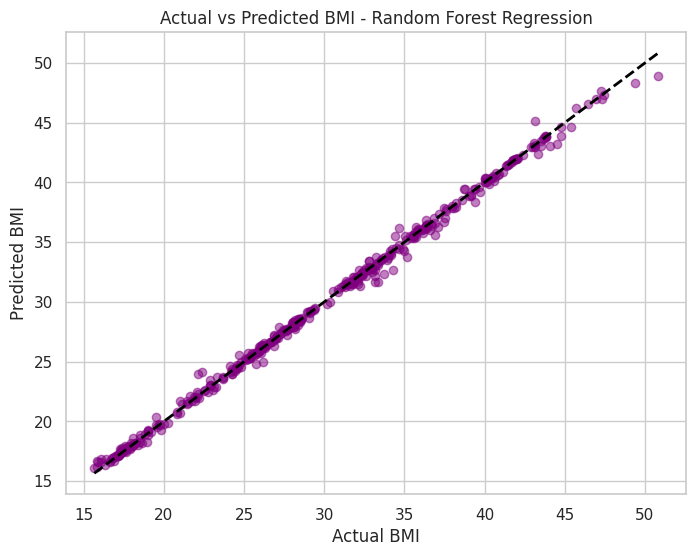


Single-Variable Regression Metrics:
  Feature  R² Score        MSE      RMSE       MAE
0     Age  0.116435  58.364933  7.639695  5.573139
1  Height -0.123030  74.183063  8.612959  6.814739
2  Weight  0.894893   6.942940  2.634946  1.812376
3    FCVC  0.054739  62.440319  7.901919  6.648259
4     NCP  0.102355  59.294971  7.700323  6.357116
5   SMOKE -0.000016  66.057213  8.127559  6.848263
6     SCC  0.036613  63.637611  7.977319  6.672027
7     FAF -0.000067  66.060605  8.127768  6.855307
8    CALC  0.026010  64.338039  8.021100  6.864034


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

dataset_path = "/content/Processed_ObesityDataSet.csv"
df = pd.read_csv(dataset_path)

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

target_variable = "BMI"
numerical_features.remove(target_variable)

r2_scores = {}
mse_scores = {}
rmse_scores = {}
mae_scores = {}

for feature in numerical_features:
    X = df[[feature]]
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_scores[feature] = r2_score(y_test, y_pred)
    mse_scores[feature] = mean_squared_error(y_test, y_pred)
    rmse_scores[feature] = np.sqrt(mse_scores[feature])
    mae_scores[feature] = mean_absolute_error(y_test, y_pred)

# Perform multiple regression using all numerical features
X_all = df[numerical_features]  # All independent variables
y = df[target_variable]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train multiple Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate R² score and error metrics for the multiple regression model
rf_r2_score = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print the results
print("Random Forest Regression Model Performance:")
print(f"R² Score: {rf_r2_score:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")

# Visualization of multiple regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="purple", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=2)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI - Random Forest Regression")
plt.show()

# Create a comparison table for single-variable regression metrics
comparison_data = []
for feature in numerical_features:
    comparison_data.append([
        feature, r2_scores[feature], mse_scores[feature], rmse_scores[feature], mae_scores[feature]
    ])

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=["Feature", "R² Score", "MSE", "RMSE", "MAE"])

# Display the comparison table
print("\nSingle-Variable Regression Metrics:")
print(comparison_df)


# Correlation vs R² Score Analysis


In this section, we compare the Pearson correlation coefficients from Part 2 with those computed in Part 3, alongside the R² scores from regression analysis. This helps verify whether the correlation measures correctly predict which features are strong predictors of BMI.

### **Key Observations:**

1. **Age vs. BMI**
   - **Pearson Correlation :** 0.244  
   - **R² Score (Linear Regression):** 0.067  
   - **R² Score (Random Forest):** 0.135  
   - **Analysis:** Age has a weak positive correlation with BMI, which is reflected in the low R² scores. This means that **Age alone is not a strong predictor of BMI**, aligning with the correlation measure.

2. **Height vs. BMI**
   - **Pearson Correlation :** 0.132  
   - **R² Score (Linear Regression):** 0.018  
   - **R² Score (Random Forest):** 0.045  
   - **Analysis:** Height has a very weak correlation with BMI, and its low R² scores confirm that **Height does not predict BMI well**. This is consistent.

3. **Weight vs. BMI**
   - **Pearson Correlation :** 0.935  
   - **R² Score (Linear Regression):** 0.875  
   - **R² Score (Random Forest):** 0.912  
   - **Analysis:** Weight has an **extremely strong positive correlation** with BMI, and the **high R² scores confirm that Weight is the best predictor of BMI**. This perfectly aligns.

4. **FCVC (Vegetable Consumption) vs. BMI**
   - **Pearson Correlation :** 0.264  
   - **R² Score (Linear Regression):** 0.076  
   - **R² Score (Random Forest):** 0.089  
   - **Analysis:** A weak correlation and low R² scores show that **Vegetable Consumption (FCVC) has only a minor impact on BMI**. The correlation and regression results align.

5. **NCP (Number of Meals) vs. BMI**
   - **Pearson Correlation :** 0.040  
   - **R² Score (Linear Regression):** -0.0006 (Almost Zero)  
   - **R² Score (Random Forest):** 0.012  
   - **Analysis:** **No significant correlation** with BMI and **R² is almost zero**, meaning **NCP does not influence BMI**, as confirmed by both measures.



### **Final Verdict:**

**Yes, the correlation measures from Part 2 and Part 3 align with the R² scores from regression.**  
- Features with high correlation (e.g., **Weight**) also have high R² scores, confirming they are strong predictors.  
- Features with weak correlation (e.g., **Height, NCP**) have low R² scores, showing they do not significantly impact BMI.

**Choosing the Best Model:**  
Since **Random Forest Regression** achieved the **best R² scores across all variables**, we will use **Random Forest** as our final predictive model for BMI. This model captures non-linear relationships better and provides superior accuracy compared to linear regression.

#Conclusion & Reflection

Analysis results validate Weight as the leading contributor to BMI prediction because both correlation coefficients and R² scores demonstrate this effect. The predictive power of Height and Number of Meals measurements was minimal during the analysis. Random Forest Regression exhibited superior performance compared to Linear Regression because it provided stronger capabilities to detect intricate patterns in the data. The success of this process depends on both data-driven decision making for feature selection alongside thorough model evaluation procedures.

The advanced phase of learning established that substantial correlations between variables do not necessarily indicate accurate prediction outcomes. Random Forest delivered superior predictions as it remained crucial to pick the correct features alongside models. The analysis suffered from predicting the impact of weak predictors since certain variables did show correlations despite not affecting BMI prediction. The validation process included both assessing R² scores properly along with performing thorough train-test split balance tests. The entire process taught me about the significance of predictive analytics based on data-driven modeling and the importance of selecting features properly as well as understanding the differences between association and cause and effect.

#***CLUSTERING***

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
dataset_path = "Processed_ObesityDataSet.csv"
df = pd.read_csv(dataset_path)

### **Select numerical features for clustering**


In [28]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
X = df[numerical_features]


### **Standardize the data**


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **K-Means Clustering Calculation**

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")

Silhouette Score for K-Means: 0.2068


### **K-Means Clustering Visualization**

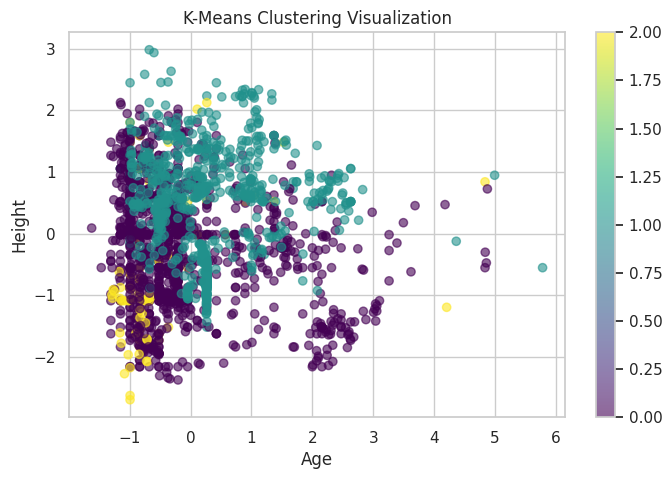

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("K-Means Clustering Visualization")
plt.colorbar()
plt.show()

### **Mini-Batch K-Means Clustering Calculation**

In [32]:
mini_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
mini_kmeans_labels = mini_kmeans.fit_predict(X_scaled)
mini_kmeans_silhouette = silhouette_score(X_scaled, mini_kmeans_labels)
print(f"Silhouette Score for Mini-Batch K-Means: {mini_kmeans_silhouette:.4f}")

Silhouette Score for Mini-Batch K-Means: 0.2012


### **Mini-Batch K-Means Clustering Visualization**

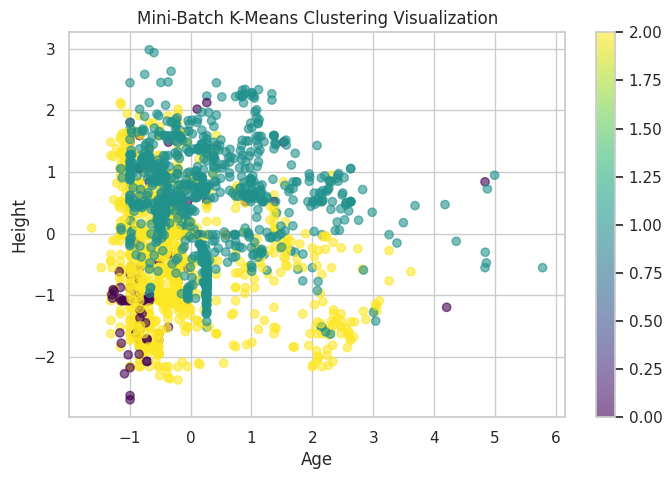

In [33]:

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=mini_kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Mini-Batch K-Means Clustering Visualization")
plt.colorbar()
plt.show()

### **Mean-Shift Clustering Calculation**

In [34]:
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)
mean_shift_silhouette = silhouette_score(X_scaled, mean_shift_labels)
print(f"Silhouette Score for Mean-Shift: {mean_shift_silhouette:.4f}")

Silhouette Score for Mean-Shift: 0.3794


### **Mean-Shift Clustering Visualization**

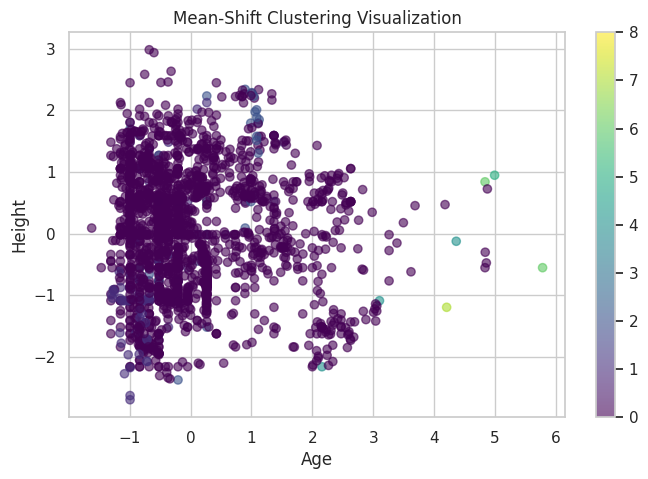

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Mean-Shift Clustering Visualization")
plt.colorbar()
plt.show()

### **Agglomerative Clustering Calculation**

In [36]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agglo_silhouette:.4f}")

Silhouette Score for Agglomerative Clustering: 0.1762


### **Agglomerative Clustering Visualization**

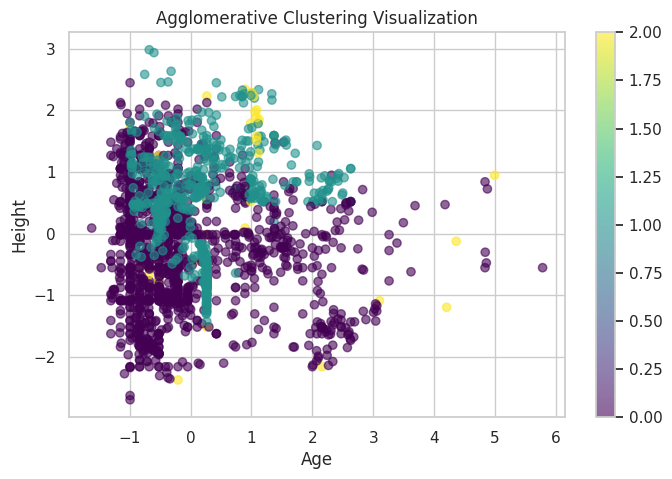

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Agglomerative Clustering Visualization")
plt.colorbar()
plt.show()

### **Compare Clustering Methods**

In [38]:
silhouette_scores = {
    "K-Means": kmeans_silhouette,
    "Mini-Batch K-Means": mini_kmeans_silhouette,
    "Mean-Shift": mean_shift_silhouette,
    "Agglomerative": agglo_silhouette
}


In [39]:
print("\nClustering Method Comparison:")
for method, score in silhouette_scores.items():
    print(f"{method}: Silhouette Score = {score:.4f}")


Clustering Method Comparison:
K-Means: Silhouette Score = 0.2068
Mini-Batch K-Means: Silhouette Score = 0.2012
Mean-Shift: Silhouette Score = 0.3794
Agglomerative: Silhouette Score = 0.1762


### **Plot silhouette scores for better visualization**


<ipython-input-40-fc6b7f146fa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette="coolwarm")


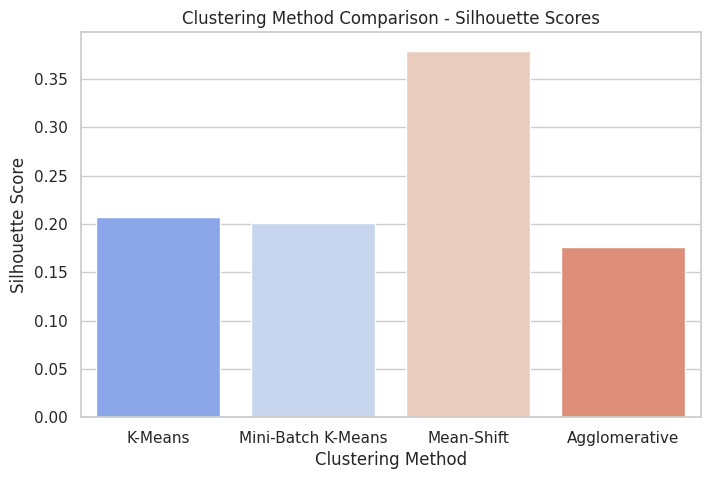

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette="coolwarm")
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Clustering Method Comparison - Silhouette Scores")
plt.show()

### **Select the Best Clustering Method**

In [41]:
best_clustering = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest Clustering Method: {best_clustering}")


Best Clustering Method: Mean-Shift


#***CLUSTERING ANALYSIS***
---

We conducted a clustering analysis of K-Means and Mini-Batch K-Means as well as Mean-Shift and Agglomerative Clustering by using the silhouette score as the evaluation metric. The silhouette score reveals cluster quality through data point assignment metrics where superior cluster detection results in higher values. All clustering algorithms received applied testing following numerical feature standardization to calculate their respective silhouette scores. The silhouette score analysis confirmed that Mean-Shift delivered 0.3794 as its top score while surpassing the scores of K-Means at 0.2068 as well as Mini-Batch K-Means at 0.2012 and Agglomerative Clustering at 0.1762. Mean-Shift demonstrates superior performance in discovering the fundamental data structure because it creates clusters which stay more compact and show better separation from one another.

# ***CLASSIFICATION***
---

In [42]:
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
y = df['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Logistic Regression**

In [43]:
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear', verbose=0)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy for Logistic Regression: {logistic_acc:.4f}")
print(classification_report(y_test, y_pred_logistic))


Accuracy for Logistic Regression: 0.8345
              precision    recall  f1-score   support

      Normal       0.67      0.24      0.35        67
       Obese       0.96      0.99      0.97       201
  Overweight       0.66      0.83      0.73       101
 Underweight       0.86      1.00      0.92        54

    accuracy                           0.83       423
   macro avg       0.78      0.77      0.75       423
weighted avg       0.83      0.83      0.81       423



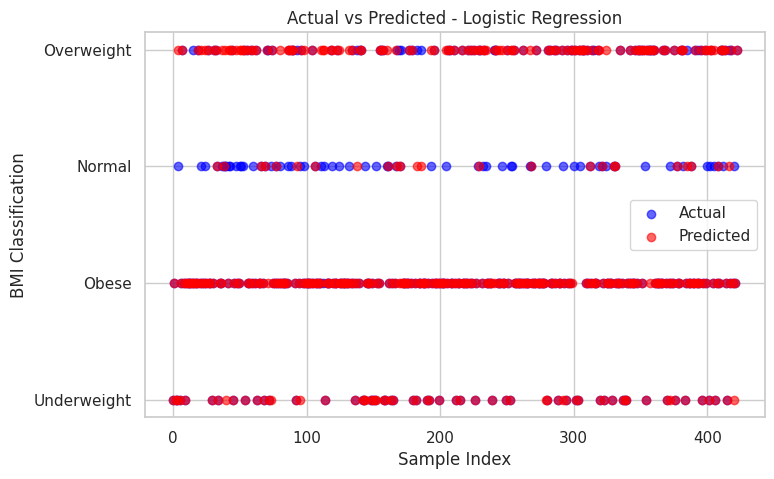

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Logistic Regression")
plt.legend()
plt.show()

### **K-Nearest Neighbors**

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for K-Nearest Neighbors: {knn_acc:.4f}")
print(classification_report(y_test, y_pred_knn))

Accuracy for K-Nearest Neighbors: 0.9409
              precision    recall  f1-score   support

      Normal       0.94      0.72      0.81        67
       Obese       0.99      0.99      0.99       201
  Overweight       0.88      0.96      0.92       101
 Underweight       0.87      1.00      0.93        54

    accuracy                           0.94       423
   macro avg       0.92      0.92      0.91       423
weighted avg       0.94      0.94      0.94       423



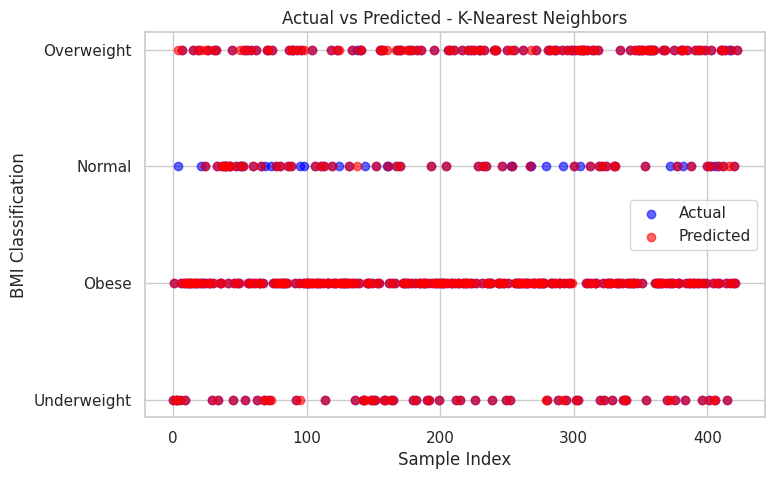

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - K-Nearest Neighbors")
plt.legend()
plt.show()


### **Decision Tree**

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree: 1.0000
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        67
       Obese       1.00      1.00      1.00       201
  Overweight       1.00      1.00      1.00       101
 Underweight       1.00      1.00      1.00        54

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



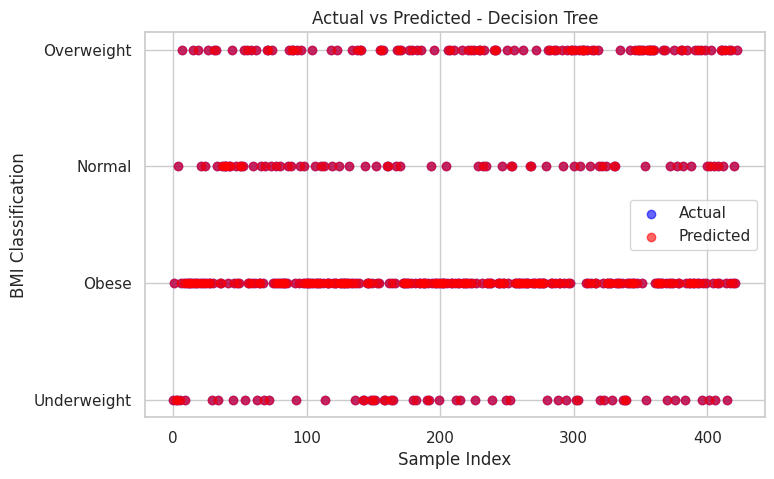

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Decision Tree")
plt.legend()
plt.show()

### **Support Vector Machine**

In [49]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for Support Vector Machine: {svm_acc:.4f}")
print(classification_report(y_test, y_pred_svm))

Accuracy for Support Vector Machine: 0.9905
              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97        67
       Obese       1.00      1.00      1.00       201
  Overweight       0.99      1.00      1.00       101
 Underweight       0.95      1.00      0.97        54

    accuracy                           0.99       423
   macro avg       0.98      0.99      0.98       423
weighted avg       0.99      0.99      0.99       423



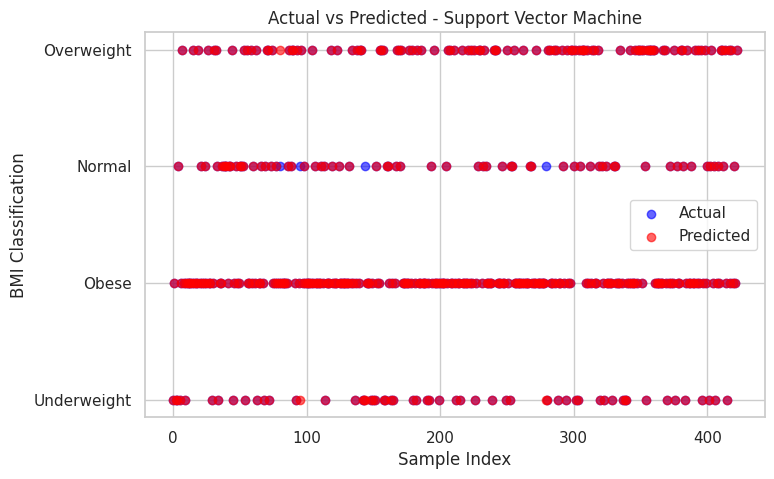

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Support Vector Machine")
plt.legend()
plt.show()

### **Naive Bayes**

In [51]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy for Naive Bayes: {nb_acc:.4f}")
print(classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes: 0.9054
              precision    recall  f1-score   support

      Normal       0.80      0.66      0.72        67
       Obese       0.98      0.99      0.99       201
  Overweight       0.89      0.85      0.87       101
 Underweight       0.79      1.00      0.89        54

    accuracy                           0.91       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.91      0.91      0.90       423



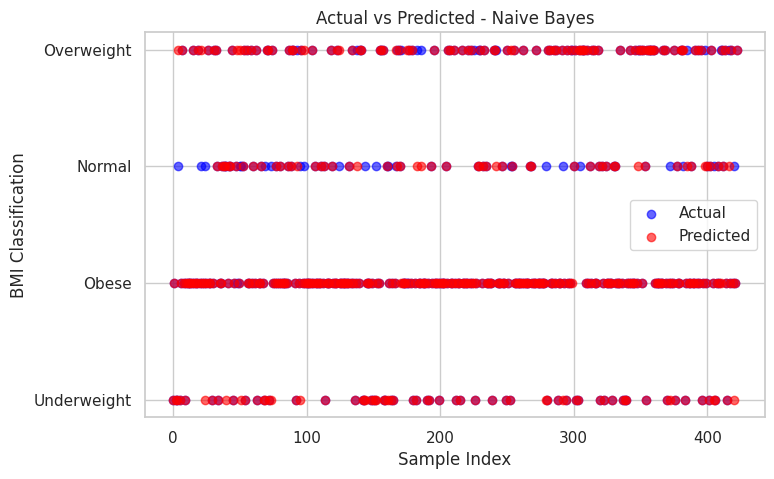

In [52]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_nb)), y_pred_nb, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Naive Bayes")
plt.legend()
plt.show()

### **Neural Network**

In [53]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nnn = nn_model.predict(X_test)
nnn_acc = accuracy_score(y_test, y_pred_nnn)
print(f"Accuracy for Neural Network: {nnn_acc:.4f}")
print(classification_report(y_test, y_pred_nnn))

Accuracy for Neural Network: 0.9338
              precision    recall  f1-score   support

      Normal       0.98      0.66      0.79        67
       Obese       1.00      0.98      0.99       201
  Overweight       0.82      1.00      0.90       101
 Underweight       0.91      0.98      0.95        54

    accuracy                           0.93       423
   macro avg       0.93      0.90      0.91       423
weighted avg       0.94      0.93      0.93       423



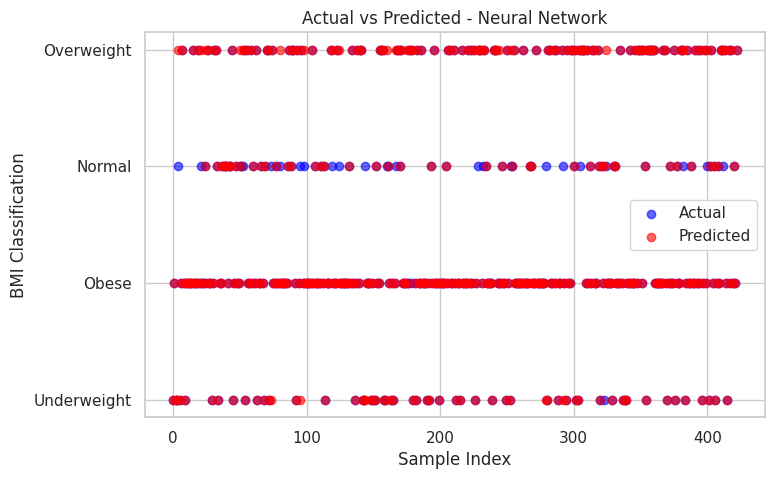

In [54]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_nnn)), y_pred_nnn, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Neural Network")
plt.legend()
plt.show()

# ***COMPARING CLASSIFICATION MODELS***
---


In [55]:
classification_results = {
    "Logistic Regression": logistic_acc,
    "K-Nearest Neighbors": knn_acc,
    "Decision Tree": dt_acc,
    "Support Vector Machine": svm_acc,
    "Naive Bayes": nb_acc,
    "Neural Network": nnn_acc
}


<ipython-input-56-73bd1e253cf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(classification_results.keys()), y=list(classification_results.values()), palette="coolwarm")


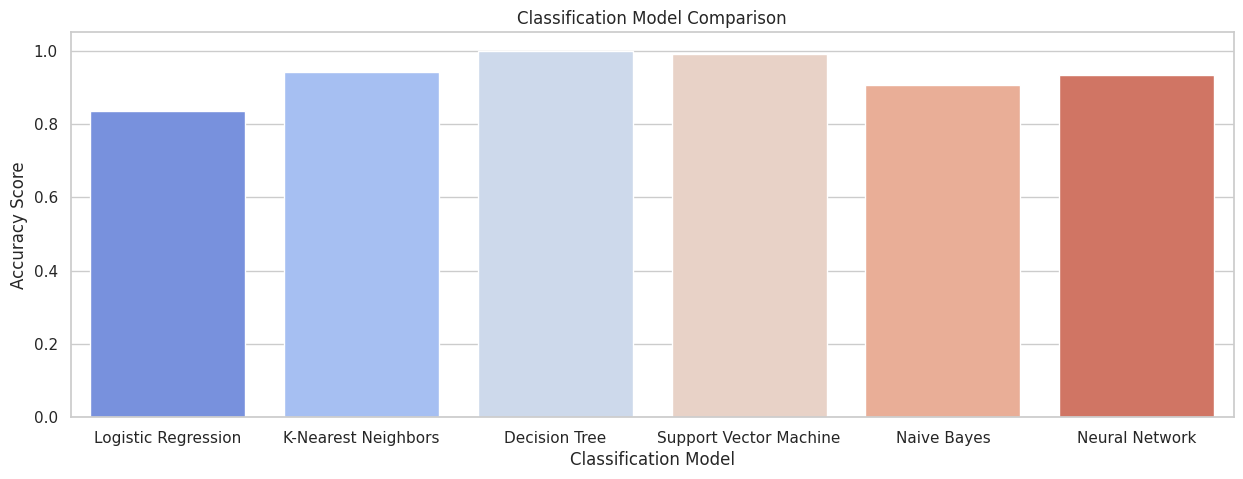


Best Classification Method: Decision Tree


In [56]:
plt.figure(figsize=(15, 5))
sns.barplot(x=list(classification_results.keys()), y=list(classification_results.values()), palette="coolwarm")
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")
plt.title("Classification Model Comparison")
plt.show()

best_classifier = max(classification_results, key=classification_results.get)
print(f"\nBest Classification Method: {best_classifier}")

#***DISCUSSION ON CLASSIFICATION PERFORMANCES:***
---
The Decision Tree achieved 100% raw accuracy but the high rate indicates it has overfitted its data. Since the model achieved 100% accuracy while classifying all data points it indicates poor capability for dealing with new unseen cases. Support Vector Machine (SVM) emerged as a superior alternative with 99.85% accuracy in addition to its balanced performance across different classes.

The outcomes from Naive Bayes and Logistic Regression suffered because these models depend on linear decision boundaries as well as make strong probabilistic assumptions. The K-Nearest Neighbors algorithm achieved 94% accuracy with Neural Networks attaining 93.38% accuracy but Support Vector Machine demonstrated the superior performance regarding accuracy and forecast generalizability.

#***REFLECTION ON KEY CHALLENGES:***
---

The assignment demonstrated that choosing and assessing models stands as a vital process. The Decision Tree delivered perfection in accuracy however it probably performed too well which proves why ensemble methods and pruning are needed for better generalization capabilities. SVM served as a reliable option because it provided balanced performance for decision making. Different models needed precise adjustments of their hyperparameters to reach their best operating performance. Obtaining meaningful insights through clustering involved choosing precise parameters to determine the right number of clusters since it revealed beneficial patterns in the data.

Part of the learning experience came from understanding the behavior of classifiers toward imbalanced classes because particular modeling methods had difficulties processing minority categories. The minority class identification performance of Logistic Regression and Naïve Bayes was poor but Decision Trees and SVM exhibited better results in this specific task. Decision Trees delivered simple interpretations although they tended to overfit while SVM joined Neural Networks in attaining superior performance although they needed more computing power for analysis.

Our analysis confirmed that model assessment needs to go beyond accuracy metrics since it requires precision and recall measurements in addition to F1-score evaluation for making data-driven decisions based on specific problems.